In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Preprocessing data

In [11]:
import os
import pandas as pd

def preprocessing(csv_path):
    if csv_path:
        df = pd.read_csv(csv_path)
        df = df.rename(columns={'ชุดข้อมูล 1:sec(s)': 'sec', 'ชุดข้อมูล 1:temp(°C)': 'temp'})
        df.to_csv(csv_path, index=False)

# Define the paths to the directories
directories = ['normal', 'anormal']

# Loop through each directory and process all CSV files
base_path = '/content/drive/MyDrive/sensor_kmitl/'
for directory in directories:
    dir_path = os.path.join(base_path, directory)
    for filename in os.listdir(dir_path):
        if filename.endswith('.csv'):
            csv_path = os.path.join(dir_path, filename)
            preprocessing(csv_path)


In [2]:
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (133 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 121925 files and directories currently install

In [3]:
%cd /content/drive/MyDrive/sensor_kmitl/

/content/drive/MyDrive/sensor_kmitl


In [4]:
!tree

.
├── anormal
│   ├── anormal1.10.csv
│   ├── anormal1.1.csv
│   ├── anormal1.2.csv
│   ├── anormal1.3.csv
│   ├── anormal1.4.csv
│   ├── anormal1.5.csv
│   ├── anormal1.6.csv
│   ├── anormal1.7.csv
│   ├── anormal1.8.csv
│   └── anormal1.9.csv
└── normal
    ├── narmal1.9.csv
    ├── normal1.10.csv
    ├── normal1.1.csv
    ├── normal1.2.csv
    ├── normal1.3.csv
    ├── normal1.4.csv
    ├── normal1.5.csv
    ├── normal1.6.csv
    ├── normal1.7.csv
    └── normal1.8.csv

2 directories, 20 files


### data visualization

figure

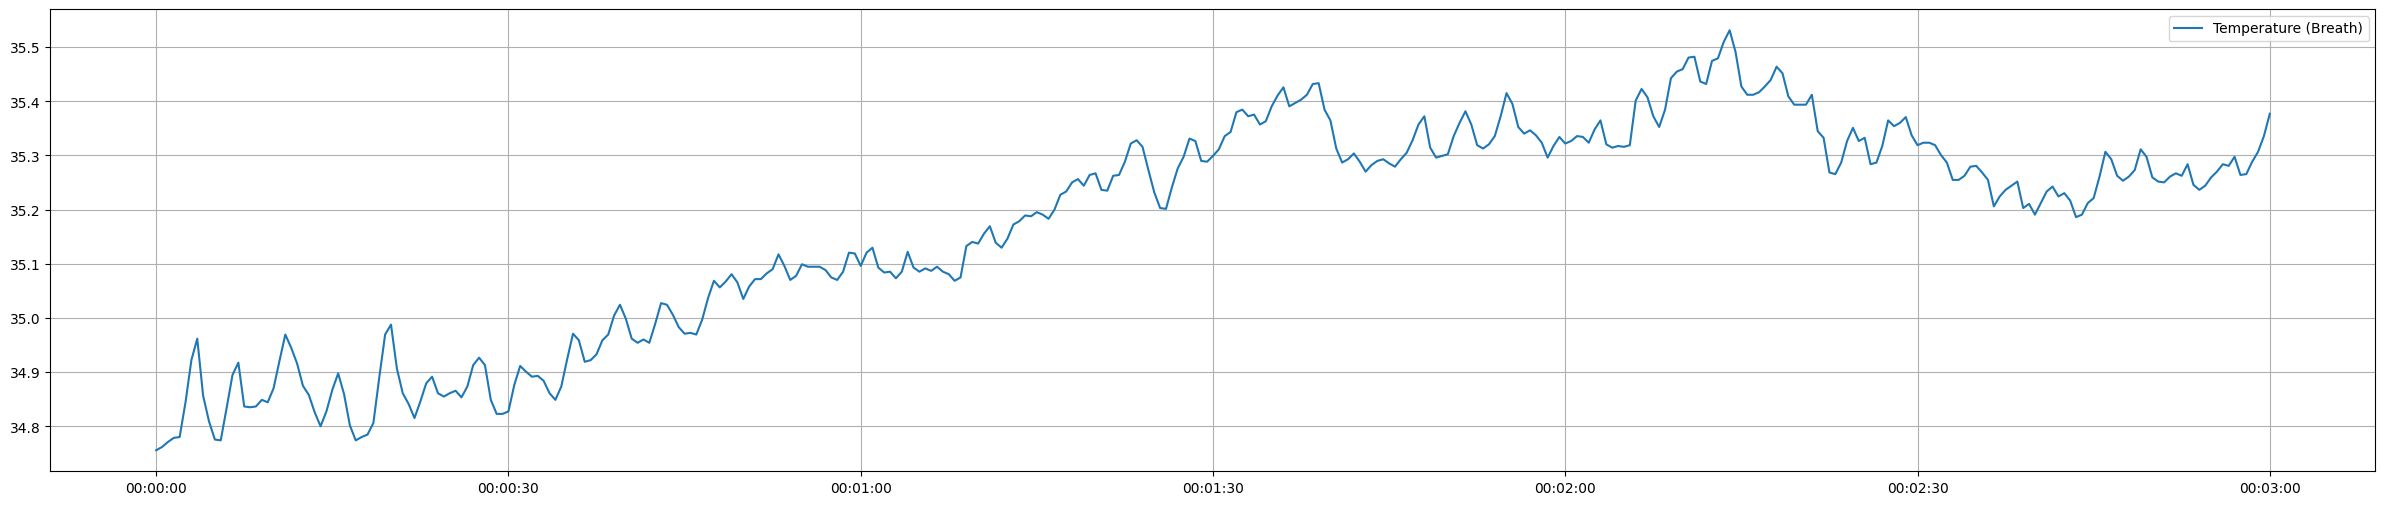

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.ensemble import IsolationForest  # For anomaly detection

# Load the data
df = pd.read_csv('/content/drive/MyDrive/sensor_kmitl/normal/normal30.csv')

# Convert the 'sec' column to datetime
df['sec'] = pd.to_datetime(df['sec'], unit='s')

# Plotting raw data for visualization
plt.figure(figsize=(30, 6))
plt.plot(df['sec'], df['temp'], label='Temperature (Breath)')
plt.legend()
plt.grid(True)

# Set x-axis to display every 5 seconds
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Save the figure as a PNG file
plt.savefig('/content/temperature_data.png')

# Display the plot
plt.show()


fft

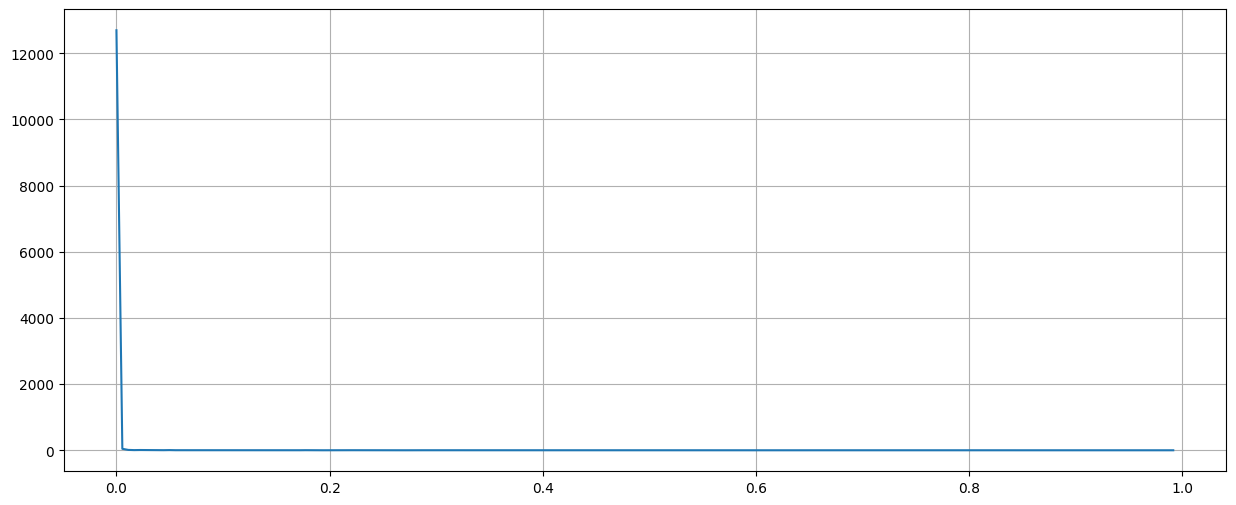

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
file_path = '/content/drive/MyDrive/sensor_kmitl/normal/normal30.csv'  # Update this path based on the uploaded file name
df = pd.read_csv(file_path)

# Convert 'sec' column to datetime
df['sec'] = pd.to_datetime(df['sec'], unit='s')


# Frequency domain analysis
temperature_data = df['temp'].values
n = len(temperature_data)
sampling_rate = 1 / (df['sec'][1] - df['sec'][0]).total_seconds()  # Assuming regular sampling intervals
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)
fft_values = np.fft.fft(temperature_data)

# Plotting the frequency domain representation
plt.figure(figsize=(15, 6))
plt.plot(frequencies[:n // 2], np.abs(fft_values)[:n // 2])
plt.title('Frequency Domain Representation of Temperature Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


dft

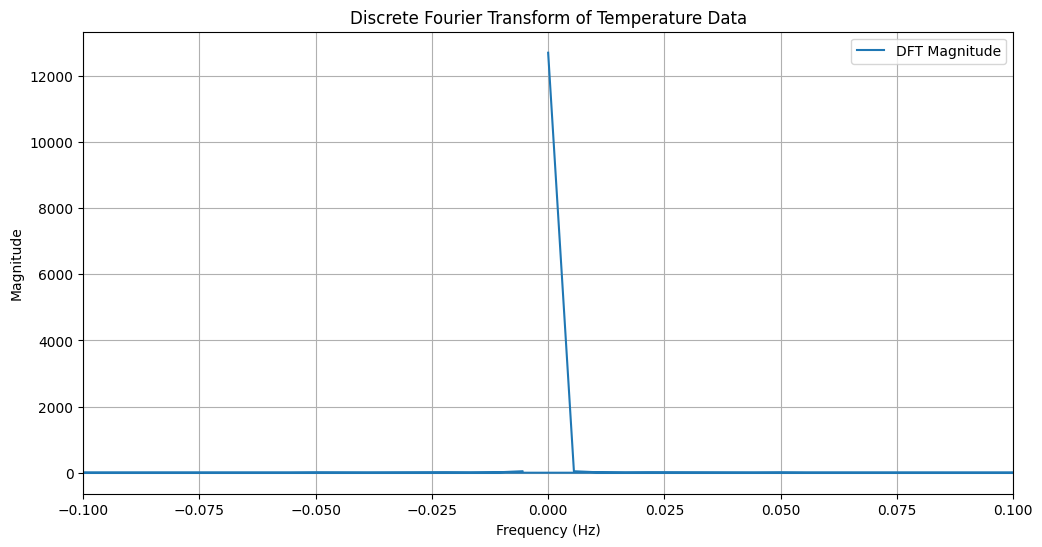

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/MyDrive/sensor_kmitl/normal/normal30.csv'  # Update this path based on the uploaded file name
df = pd.read_csv(file_path)

# Convert 'sec' column to datetime
df['sec'] = pd.to_datetime(df['sec'], unit='s')

# Perform Discrete Fourier Transform (DFT)
temp_data = df['temp']
n = len(temp_data)
temp_dft = np.fft.fft(temp_data)
freq = np.fft.fftfreq(n, (df['sec'][1] - df['sec'][0]).total_seconds())

# Plotting DFT magnitude for visualization
plt.figure(figsize=(12, 6))
plt.plot(freq, np.abs(temp_dft), label='DFT Magnitude')
plt.title('Discrete Fourier Transform of Temperature Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.xlim(-0.1, 0.1)  # Set the range of frequency to -0.25 to 0.25
plt.show()


stft

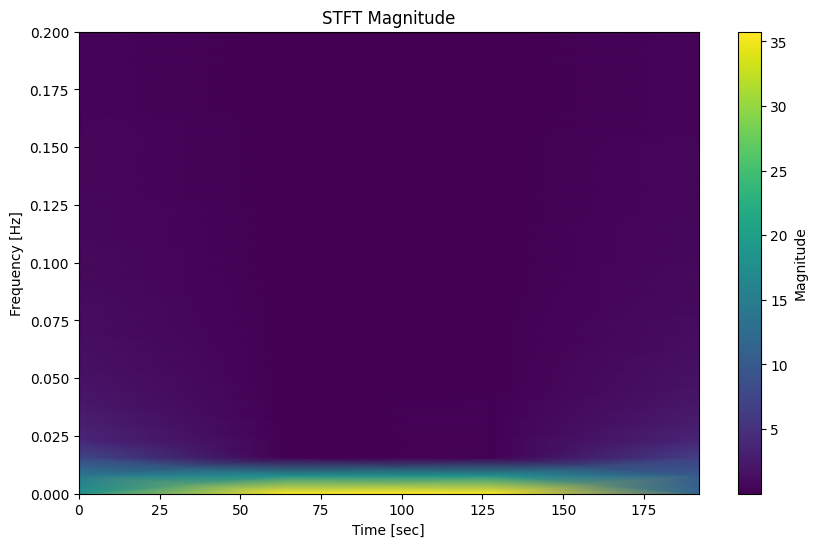

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# Load the data
file_path = '/content/drive/MyDrive/sensor_kmitl/normal/normal30.csv'  # Update this path based on the uploaded file name
df = pd.read_csv(file_path)

# Convert 'sec' column to datetime
df['sec'] = pd.to_datetime(df['sec'], unit='s')

# Assuming the signal data is in a column named 'temp'
signal = df['temp'].values  # Update this to the correct column name if different
fs = 1 / (df['sec'][1] - df['sec'][0]).total_seconds()  # Sampling frequency

# Compute the STFT with a higher window length for better frequency resolution
nperseg = 256
f, t, Zxx = stft(signal, fs=fs, nperseg=nperseg)

# Plot the STFT
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude')

# Set the y-axis range
plt.ylim(0, 0.2)  # Update these values to the desired frequency range

plt.show()


### Prototyping

zero shot

In [ ]:
import torch
import numpy as np
from transformers import BertTokenizer, BertModel
from torchvision import models, transforms
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.ensemble import IsolationForest  # For anomaly detection
def classify_breathing_v1(path):
  # Load the data
  df = pd.read_csv(path)

  # Convert the 'sec' column to datetime
  df['sec'] = pd.to_datetime(df['sec'], unit='s')

  # Plotting raw data for visualization
  plt.figure(figsize=(30, 6))
  plt.plot(df['sec'], df['temp'], label='Temperature (Breath)')
  plt.legend()
  plt.grid(True)

  # Set x-axis to display every 5 seconds
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

  # Save the figure as a PNG file
  plt.savefig('/content/temperature_data.png')

  # Display the plot
  plt.show()

  # Feature extraction
  model = models.resnet50(pretrained=True)
  model = model.eval()
  image_path = "/content/temperature_data.png"
  transform = transforms.Compose([
      transforms.Resize((224, 224)),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])

  def extract_features(image_path):
      image = Image.open(image_path).convert('RGB')
      image = transform(image).unsqueeze(0)
      with torch.no_grad():
          features = model(image)
      return features.squeeze().numpy()

  # Semantic embedding
  tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
  model_bert = BertModel.from_pretrained('bert-base-uncased')

  def get_semantic_embedding(text):
      inputs = tokenizer(text, return_tensors='pt')
      outputs = model_bert(**inputs)
      return outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy()

  # Dimension alignment
  def align_dimensions(image_features, target_dim):
      # Linear transformation to match dimensions
      linear_transform = torch.nn.Linear(image_features.shape[0], target_dim)
      with torch.no_grad():
          aligned_features = linear_transform(torch.tensor(image_features))
      return aligned_features.numpy()

  # Classification
  def classify_signal(image_path, class_descriptions):
      image_features = extract_features(image_path)
      image_features = align_dimensions(image_features, 768)
      class_embeddings = [get_semantic_embedding(desc) for desc in class_descriptions]

      # Find the class with the highest similarity
      similarities = [np.dot(image_features, emb) for emb in class_embeddings]
      return class_descriptions[np.argmax(similarities)]

  # Example usage
  class_descriptions = ["sine noise", "sine noise with linear noise"]
  predicted_class = classify_signal(image_path, class_descriptions)
  print(f"The predicted class is: {predicted_class}")


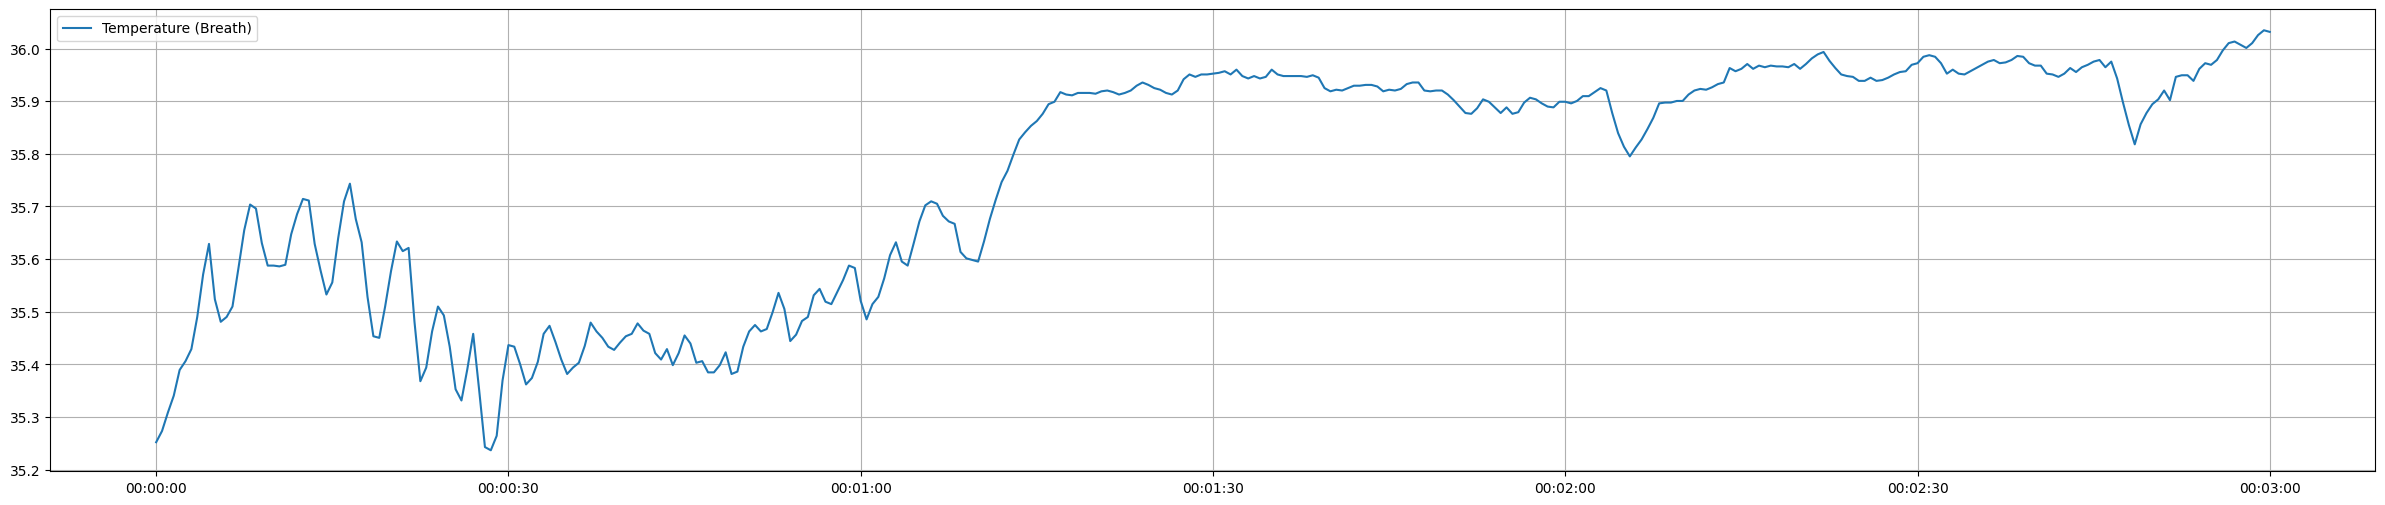

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


The predicted class is: sine noise with linear noise


In [ ]:
classify_breathing_v1('/content/drive/MyDrive/sensor_kmitl/anormal/anormal30.csv')

zero-shot v2

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


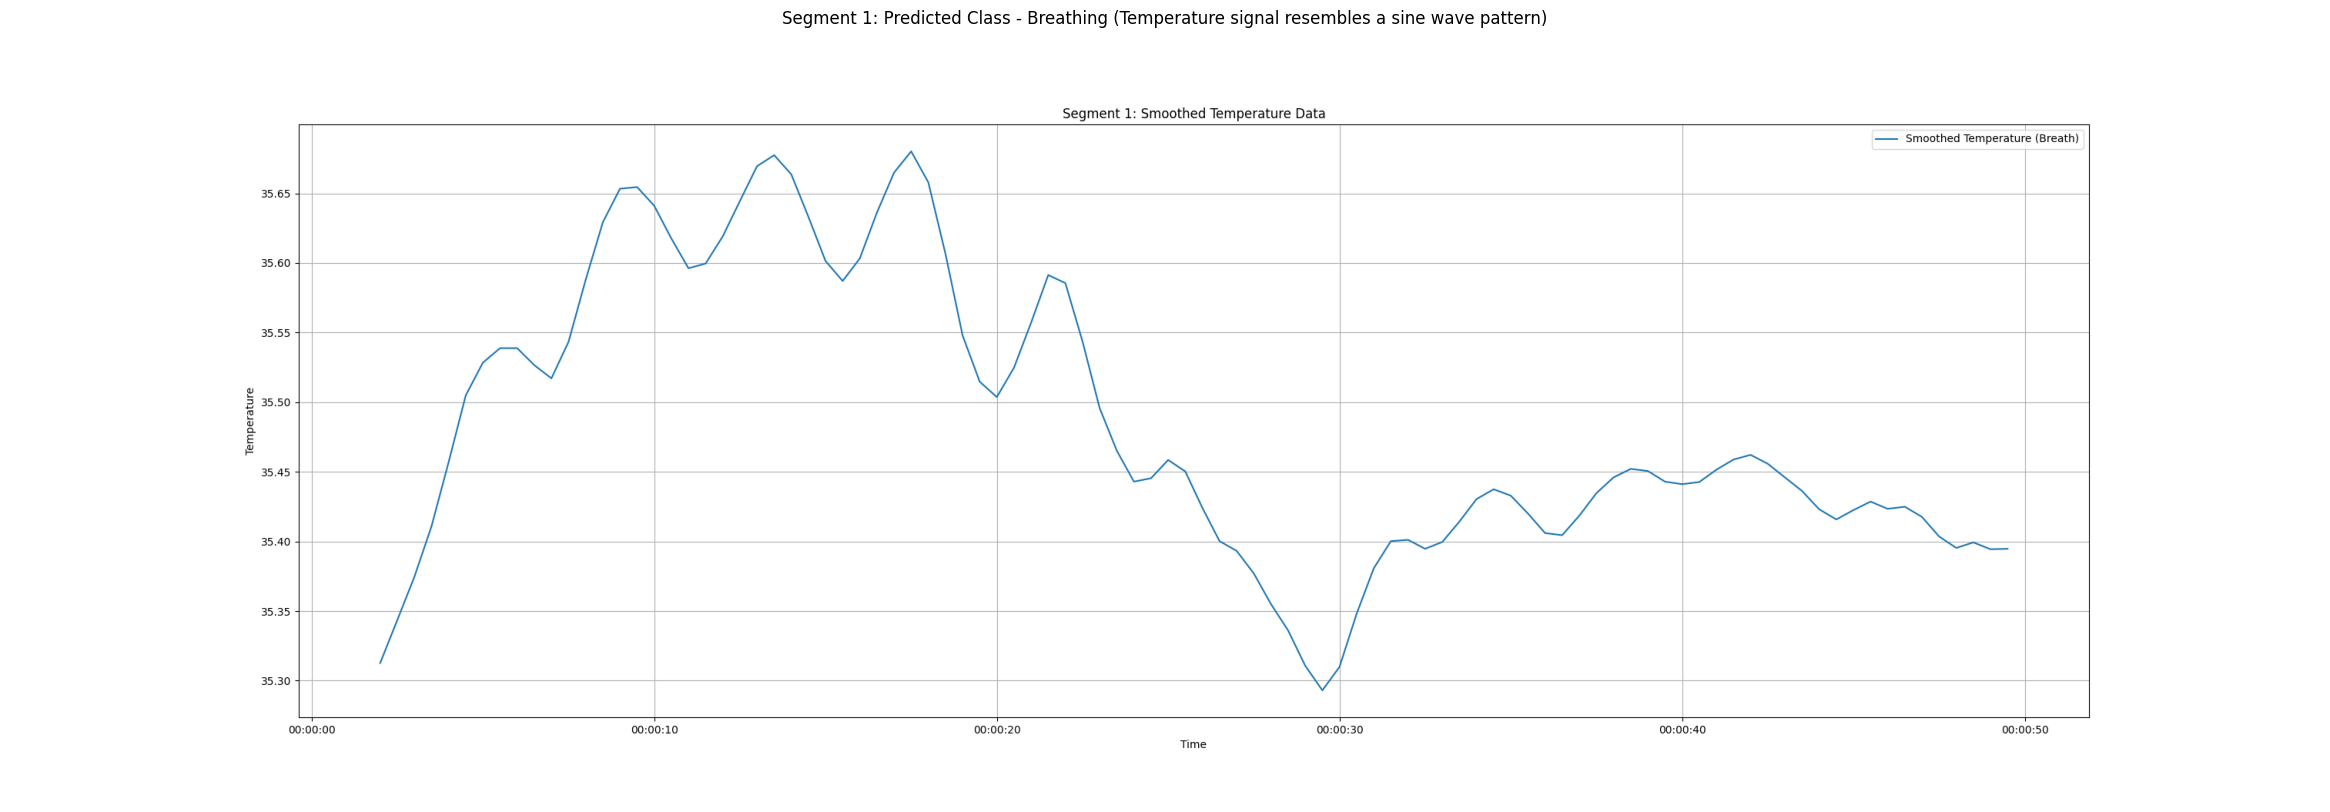

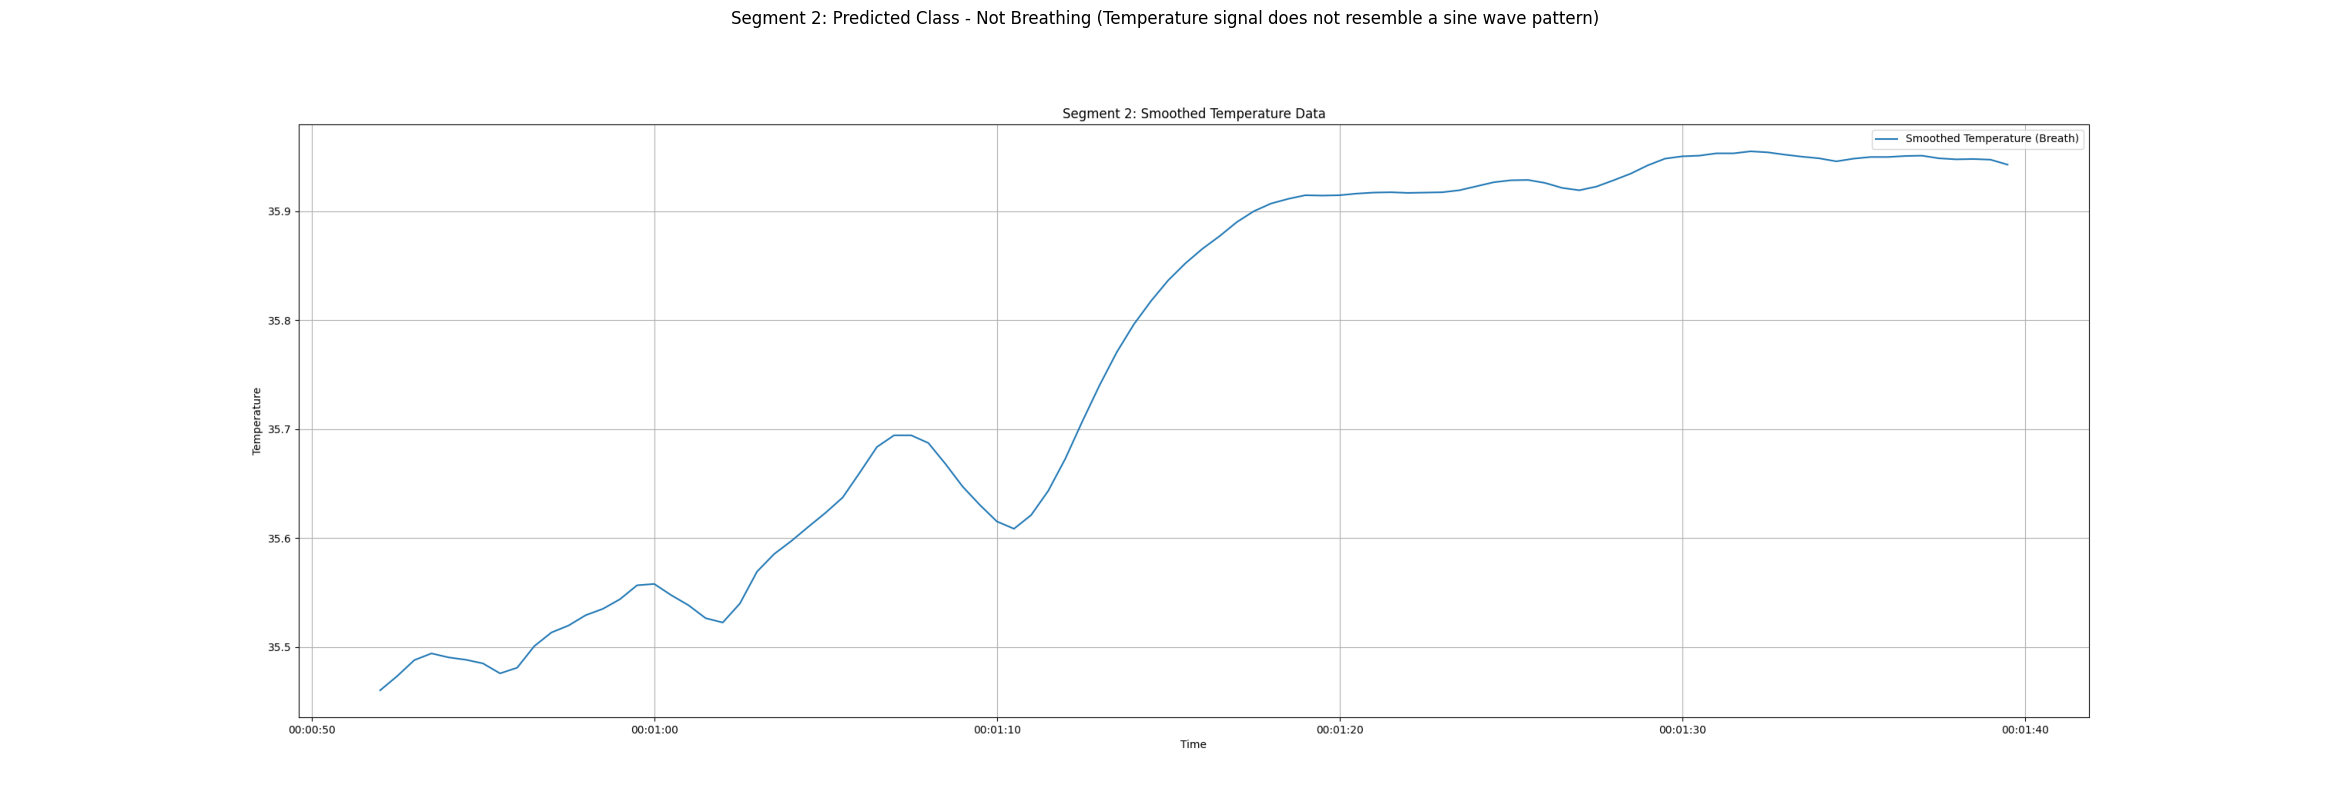

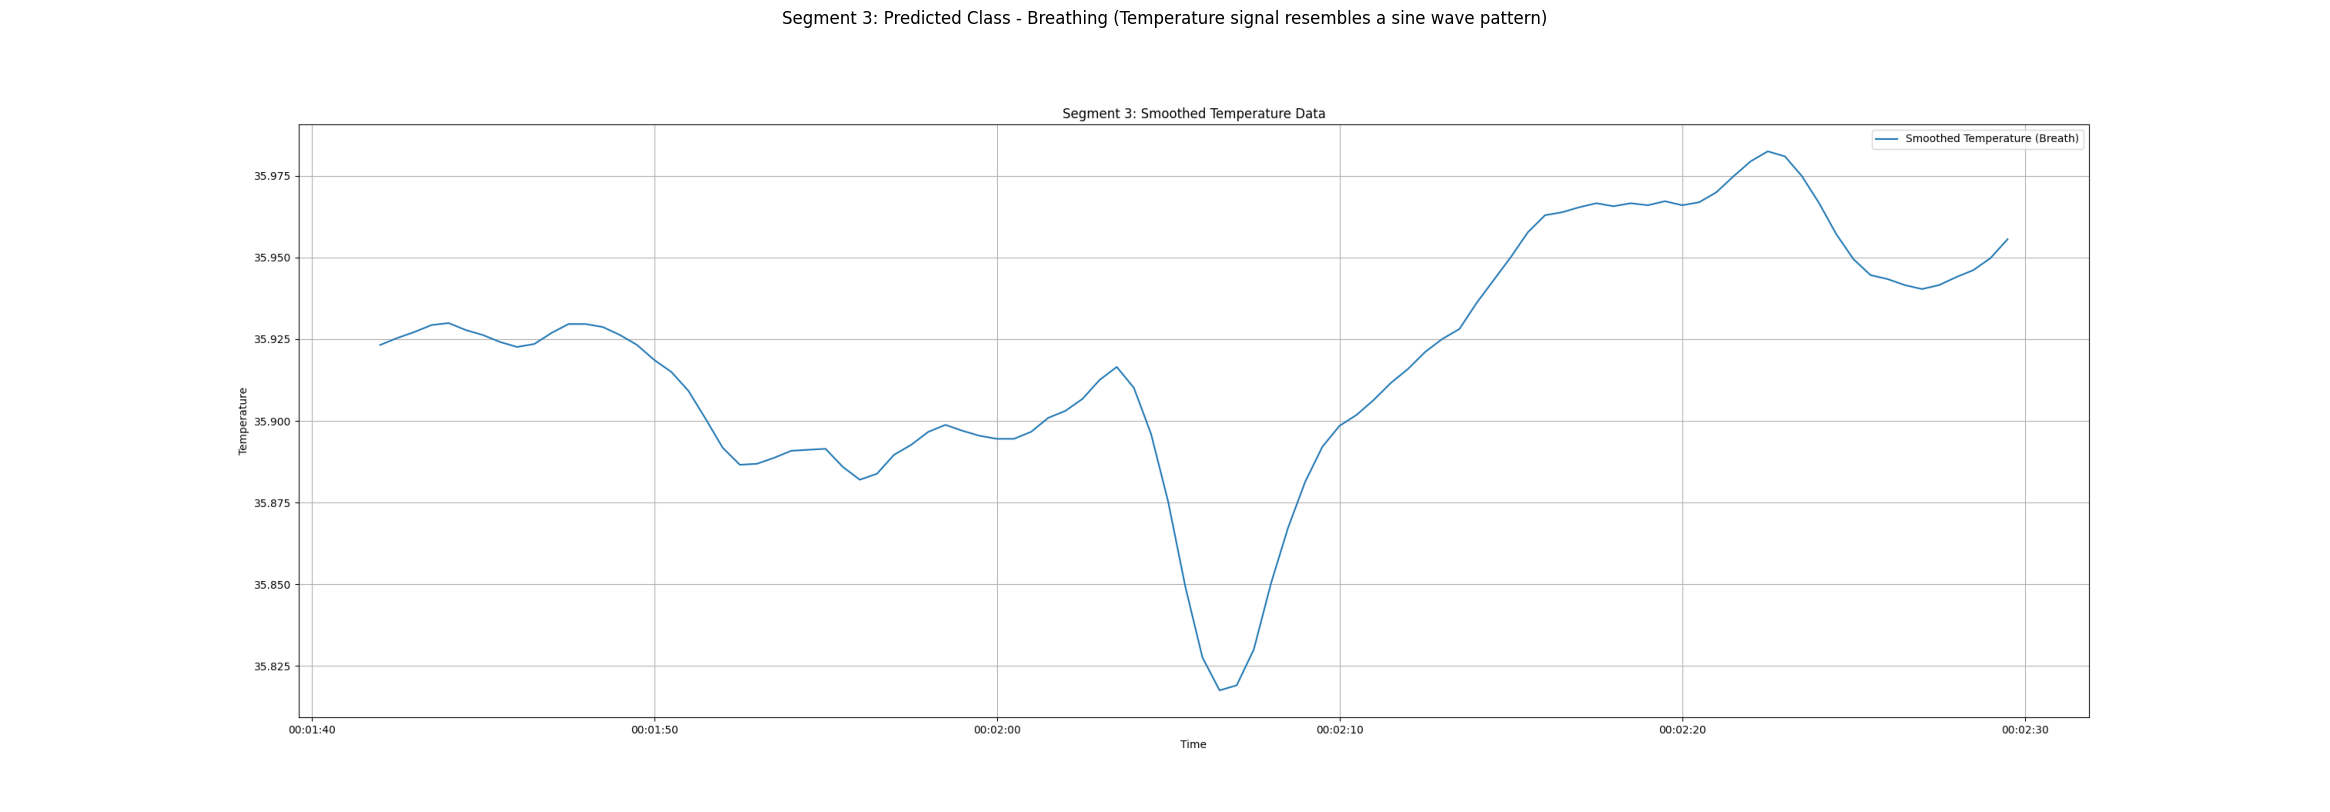

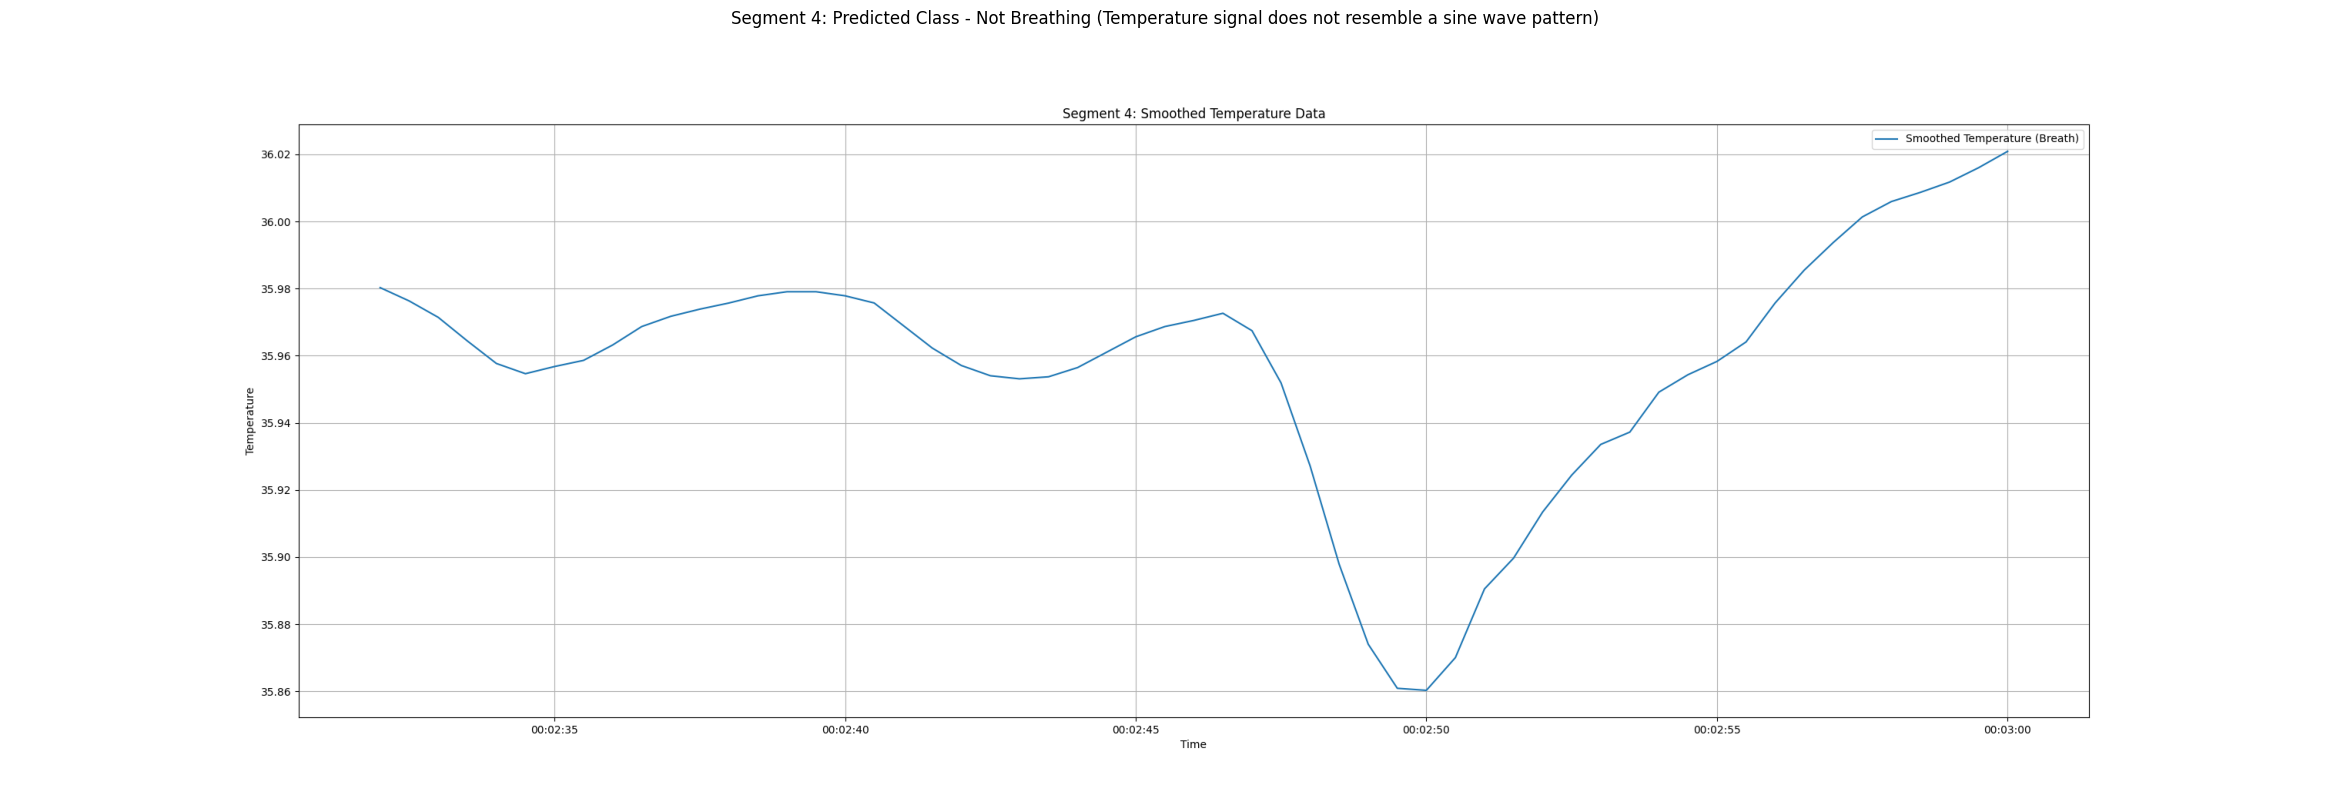

Memory usage (before loading data): 2320.43 MB
Memory usage (after loading data and initializing models): 2320.43 MB
Memory usage (before classification): 2320.43 MB
Memory usage (after classification): 2320.43 MB
Memory usage (final): 0.000 MB
Total execution time: 16.61 seconds
Segment from 1970-01-01 00:00:00 to 1970-01-01 00:00:49.500000: Breathing (Temperature signal resembles a sine wave pattern)
Segment from 1970-01-01 00:00:50 to 1970-01-01 00:01:39.500000: Not Breathing (Temperature signal does not resemble a sine wave pattern)
Segment from 1970-01-01 00:01:40 to 1970-01-01 00:02:29.500000: Breathing (Temperature signal resembles a sine wave pattern)
Segment from 1970-01-01 00:02:30 to 1970-01-01 00:03:00: Not Breathing (Temperature signal does not resemble a sine wave pattern)


In [ ]:
import torch
import numpy as np
from transformers import BertTokenizer, BertModel
from torchvision import models, transforms
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import resource
import time

# Function to apply noise reduction with a moving average filter
def apply_noise_reduction(data, window_size=5):
    return data.rolling(window=window_size).mean()

# Function to classify breathing data
def classify_breathing(path):
    # Track time
    start_time = time.time()

    # Track memory before loading data
    before_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1024

    # Load the data
    df = pd.read_csv(path)

    # Convert the 'sec' column to datetime
    df['sec'] = pd.to_datetime(df['sec'], unit='s')

    # Segment data into 50-second intervals
    df = df.set_index('sec')
    segments = [group for _, group in df.resample('50S') if not group.empty]

    # Initialize models
    resnet_model = models.resnet50(pretrained=True).eval()
    bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    bert_model = BertModel.from_pretrained('bert-base-uncased')

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    def extract_features(image_path):
        image = Image.open(image_path).convert('RGB')
        image = transform(image).unsqueeze(0)
        with torch.no_grad():
            features = resnet_model(image)
        return features.squeeze().numpy()

    def get_semantic_embedding(text):
        inputs = bert_tokenizer(text, return_tensors='pt')
        outputs = bert_model(**inputs)
        return outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy()

    def align_dimensions(image_features, target_dim):
        linear_transform = torch.nn.Linear(image_features.shape[0], target_dim)
        with torch.no_grad():
            aligned_features = linear_transform(torch.tensor(image_features))
        return aligned_features.numpy()

    def classify_signal(image_path, class_descriptions):
        image_features = extract_features(image_path)
        image_features = align_dimensions(image_features, 768)
        class_embeddings = [get_semantic_embedding(desc) for desc in class_descriptions]
        similarities = [np.dot(image_features, emb) for emb in class_embeddings]
        return class_descriptions[np.argmax(similarities)]

    class_descriptions = [
        "Breathing (Temperature signal resembles a sine wave pattern)",
        "Not Breathing (Temperature signal does not resemble a sine wave pattern)"
    ]

    results = []

    # Track memory after loading data and initializing models
    after_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1024

    # Process each segment
    for i, segment in enumerate(segments):
        # Apply noise reduction
        segment['temp_smoothed'] = apply_noise_reduction(segment['temp'])

        # Plot the segment with smoothed temperature data
        plt.figure(figsize=(30, 10))
        plt.plot(segment.index, segment['temp_smoothed'], label='Smoothed Temperature (Breath)')
        plt.legend()
        plt.grid(True)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
        plt.title(f"Segment {i+1}: Smoothed Temperature Data")
        plt.xlabel("Time")
        plt.ylabel("Temperature")
        image_path = f'/content/temperature_data_{i}.png'
        plt.savefig(image_path)
        plt.close()

        # Track memory before classification
        before_classification_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1024

        # Classify the segment
        predicted_class = classify_signal(image_path, class_descriptions)
        results.append((segment.index[0], segment.index[-1], predicted_class))

        # Display the classified segment image
        img = Image.open(image_path)
        plt.figure(figsize=(30, 10))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Segment {i+1}: Predicted Class - {predicted_class}")
        plt.show()

        # Track memory after classification
        after_classification_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1024

    # Track total memory usage after processing all segments
    final_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1024

    # Track total execution time
    total_time = time.time() - start_time

    # Output memory and time metrics
    print(f"Memory usage (before loading data): {before_memory:.2f} MB")
    print(f"Memory usage (after loading data and initializing models): {after_memory:.2f} MB")
    print(f"Memory usage (before classification): {before_classification_memory:.2f} MB")
    print(f"Memory usage (after classification): {after_classification_memory:.2f} MB")
    print(f"Memory usage (final): {(final_memory - before_memory):.3f} MB")
    print(f"Total execution time: {total_time:.2f} seconds")

    for start, end, classification in results:
        print(f"Segment from {start} to {end}: {classification}")

# Example usage
path_to_csv = '/content/drive/MyDrive/sensor_kmitl/anormal/anormal30.csv'
classify_breathing(path_to_csv)


zero-shot v3

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


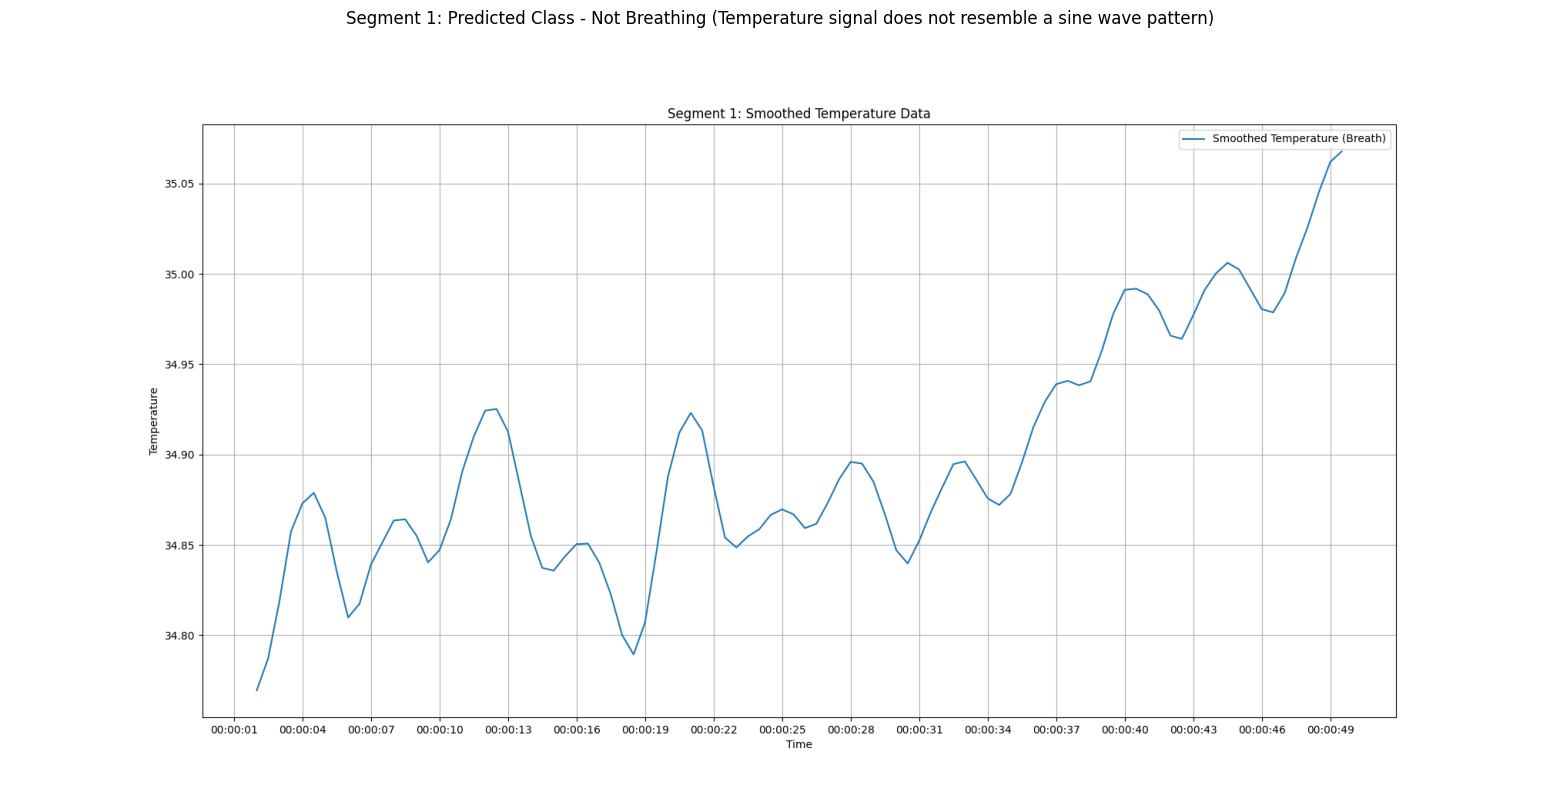

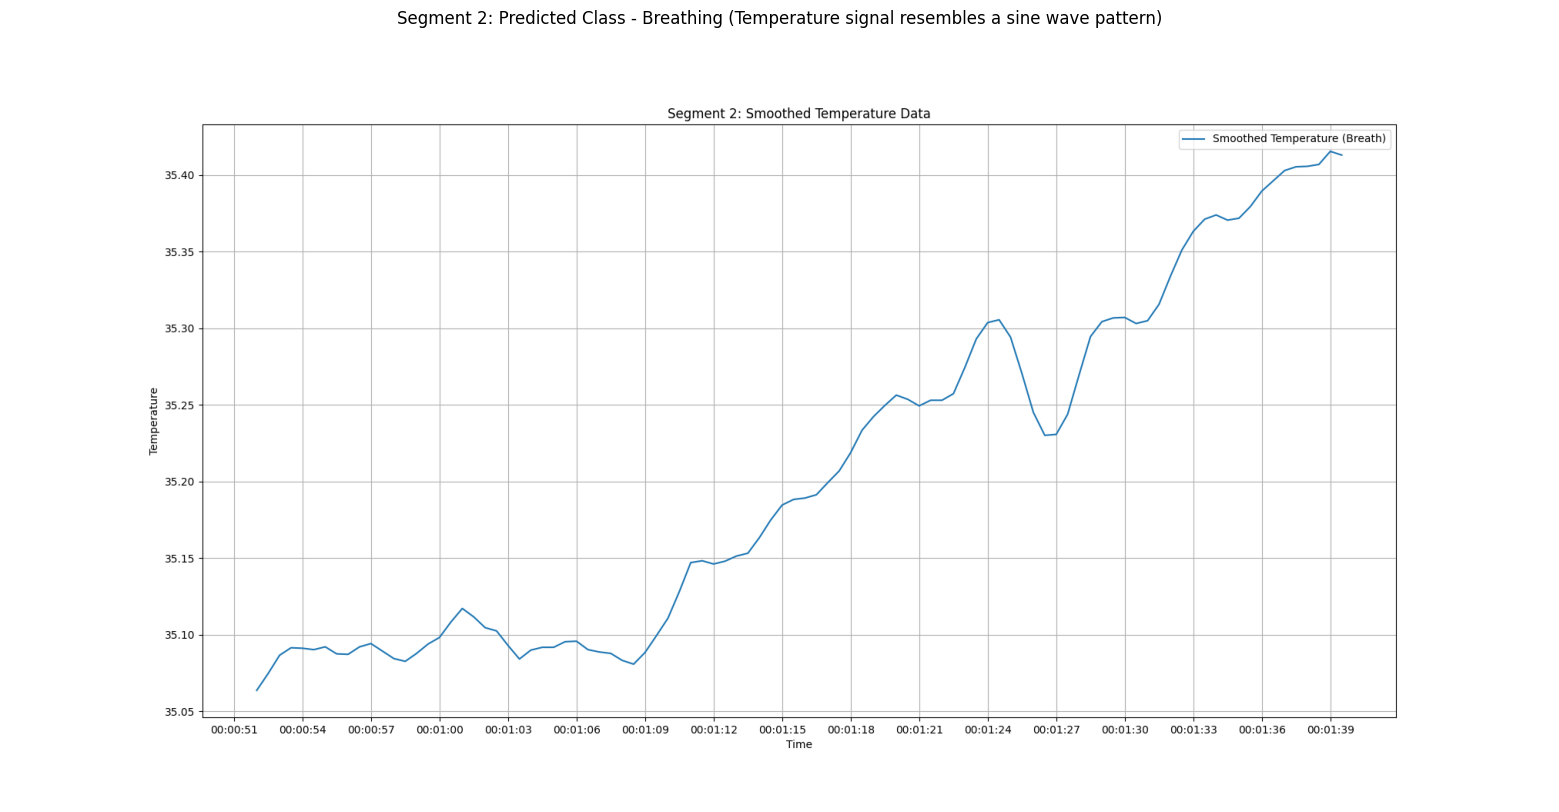

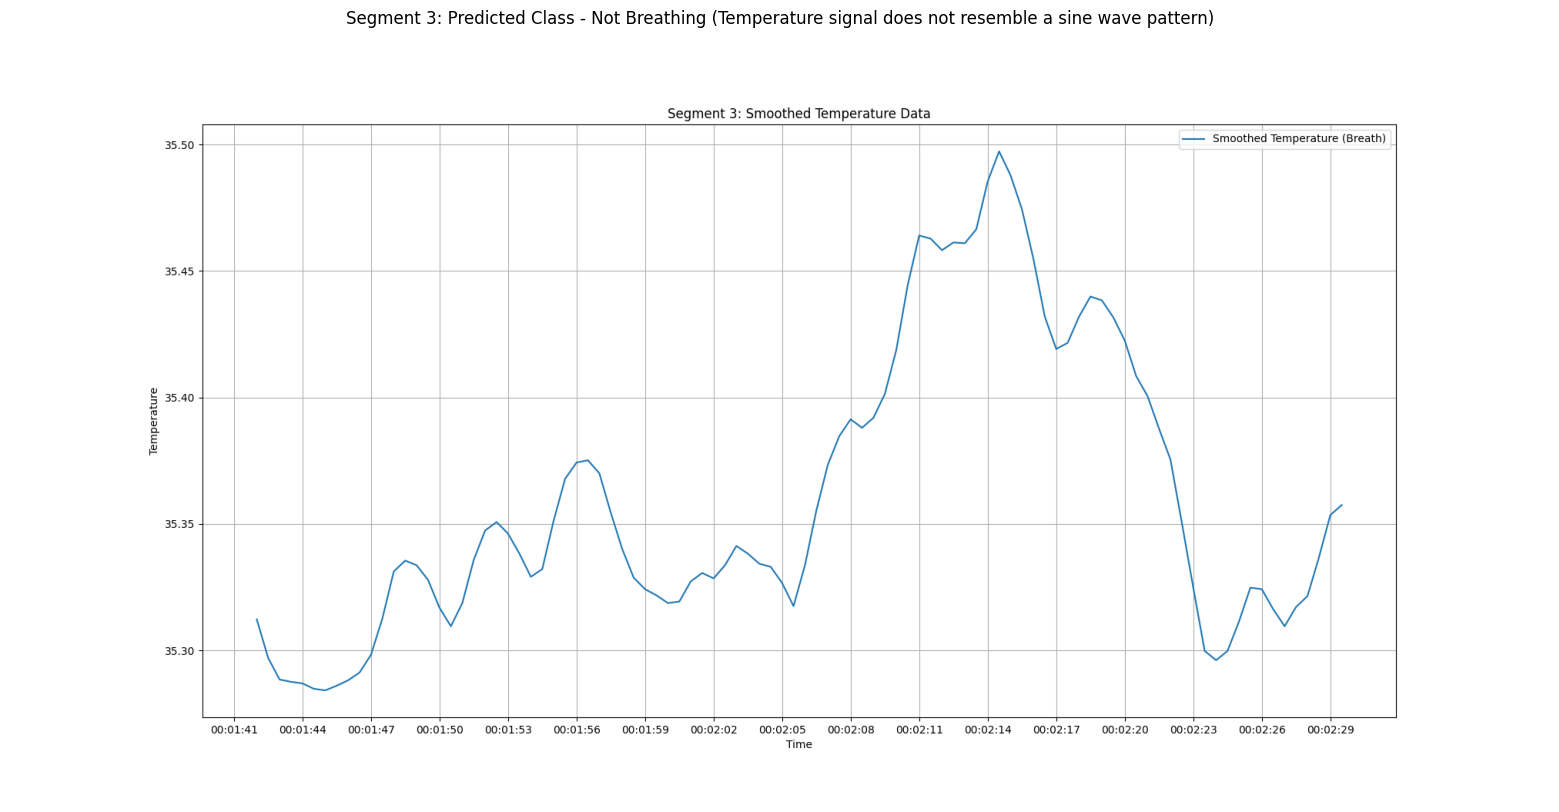

In [ ]:
import torch
import numpy as np
from transformers import BertTokenizer, BertModel
from torchvision import models, transforms
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import resource
import time

# Function to apply noise reduction with a moving average filter
def apply_noise_reduction(data, window_size=5):
    return data.rolling(window=window_size).mean()

# Function to classify breathing data
def classify_breathing(path):
    # Track time
    start_time = time.time()

    # Track memory before loading data
    before_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1024

    # Load the data
    df = pd.read_csv(path)

    # Convert the 'sec' column to datetime
    df['sec'] = pd.to_datetime(df['sec'], unit='s')

    # Segment data into 50-second intervals
    df = df.set_index('sec')
    segments = [group for _, group in df.resample('50S') if not group.empty]

    # Initialize models
    resnet_model = models.resnet50(pretrained=True).eval()
    bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    bert_model = BertModel.from_pretrained('bert-base-uncased')

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    def extract_features(image_path):
        image = Image.open(image_path).convert('RGB')
        image = transform(image).unsqueeze(0)
        with torch.no_grad():
            features = resnet_model(image)
        return features.squeeze().numpy()

    def get_semantic_embedding(text):
        inputs = bert_tokenizer(text, return_tensors='pt')
        outputs = bert_model(**inputs)
        return outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy()

    def align_dimensions(image_features, target_dim):
        linear_transform = torch.nn.Linear(image_features.shape[0], target_dim)
        with torch.no_grad():
            aligned_features = linear_transform(torch.tensor(image_features))
        return aligned_features.numpy()

    def classify_signal(image_path, class_descriptions):
        image_features = extract_features(image_path)
        image_features = align_dimensions(image_features, 768)
        class_embeddings = [get_semantic_embedding(desc) for desc in class_descriptions]
        similarities = [np.dot(image_features, emb) for emb in class_embeddings]
        return class_descriptions[np.argmax(similarities)]

    class_descriptions = [
        "Breathing (Temperature signal resembles a sine wave pattern)",
        "Not Breathing (Temperature signal does not resemble a sine wave pattern)"
    ]

    results = []

    # Track memory after loading data and initializing models
    after_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1024

    # Process each segment
    for i, segment in enumerate(segments):
        # Apply noise reduction
        segment['temp_smoothed'] = apply_noise_reduction(segment['temp'])

        # Plot the segment with smoothed temperature data
        plt.figure(figsize=(20, 10))
        plt.plot(segment.index, segment['temp_smoothed'], label='Smoothed Temperature (Breath)')
        plt.legend()
        plt.grid(True)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
        plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=3))  # Set x-axis ticks every 5 seconds
        plt.title(f"Segment {i+1}: Smoothed Temperature Data")
        plt.xlabel("Time")
        plt.ylabel("Temperature")
        image_path = f'/content/temperature_data_{i}.png'
        plt.savefig(image_path)
        plt.close()

        # Track memory before classification
        before_classification_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1024

        # Classify the segment
        predicted_class = classify_signal(image_path, class_descriptions)
        results.append((segment.index[0], segment.index[-1], predicted_class))

        # Display the classified segment image
        img = Image.open(image_path)
        plt.figure(figsize=(30, 10))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Segment {i+1}: Predicted Class - {predicted_class}")
        plt.show()

        # Track memory after classification
        after_classification_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1024

    # Track total memory usage after processing all segments
    final_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1024

    # Track total execution time
    total_time = time.time() - start_time

    # Output memory and time metrics
    print(f"Memory usage (before loading data): {before_memory:.2f} MB")
    print(f"Memory usage (after loading data and initializing models): {after_memory:.2f} MB")
    print(f"Memory usage (before classification): {before_classification_memory:.2f} MB")
    print(f"Memory usage (after classification): {after_classification_memory:.2f} MB")
    print(f"Memory usage (final): {(final_memory - before_memory):.3f} MB")
    print(f"Total execution time: {total_time:.2f} seconds")

    for start, end, classification in results:
        print(f"Segment from {start} to {end}: {classification}")

# Example usage
path_to_csv = '/content/drive/MyDrive/sensor_kmitl/normal/normal30.csv'
classify_breathing(path_to_csv)


### Evaluate

In [5]:
import os
import torch
import numpy as np
from transformers import BertTokenizer, BertModel
from torchvision import models, transforms
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import precision_score, f1_score, accuracy_score

# Check if GPU is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize models and tokenizer once
resnet_model = models.resnet50(pretrained=True).eval().to(device)
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

class_descriptions = [
    "Breathing (Temperature signal resembles a sine wave pattern)",
    "Not Breathing (Temperature signal does not resemble a sine wave pattern)"
]

class_mapping = {
    "Breathing (Temperature signal resembles a sine wave pattern)": 0,
    "Not Breathing (Temperature signal does not resemble a sine wave pattern)": 1
}

# Function to apply noise reduction with a moving average filter
def apply_noise_reduction(data, window_size=5):
    return data.rolling(window=window_size).mean()

def extract_features(image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        features = resnet_model(image)
    return features.squeeze().cpu().numpy()

def get_semantic_embedding(text):
    inputs = bert_tokenizer(text, return_tensors='pt').to(device)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().detach().cpu().numpy()

def align_dimensions(image_features, target_dim):
    linear_transform = torch.nn.Linear(image_features.shape[0], target_dim).to(device)
    with torch.no_grad():
        aligned_features = linear_transform(torch.tensor(image_features).to(device))
    return aligned_features.cpu().numpy()

def classify_signal(image_path, class_descriptions):
    image_features = extract_features(image_path)
    image_features = align_dimensions(image_features, 768)
    class_embeddings = [get_semantic_embedding(desc) for desc in class_descriptions]
    similarities = [np.dot(image_features, emb) for emb in class_embeddings]
    return class_descriptions[np.argmax(similarities)]

# Function to classify breathing data
def classify_breathing(path):
    # Load the data
    df = pd.read_csv(path)

    # Convert the 'sec' column to datetime
    df['sec'] = pd.to_datetime(df['sec'], unit='s')

    # Segment data into 50-second intervals
    df = df.set_index('sec')
    segments = [group for _, group in df.resample('50S') if not group.empty]

    results = []

    # Process each segment
    for i, segment in enumerate(segments):
        # Apply noise reduction
        segment['temp_smoothed'] = apply_noise_reduction(segment['temp'])

        # Plot the segment with smoothed temperature data
        plt.figure(figsize=(20, 10))
        plt.plot(segment.index, segment['temp_smoothed'], label='Smoothed Temperature (Breath)')
        plt.legend()
        plt.grid(True)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
        plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=3))  # Set x-axis ticks every 5 seconds
        plt.title(f"Segment {i+1}: Smoothed Temperature Data")
        plt.xlabel("Time")
        plt.ylabel("Temperature")
        image_path = f'temperature_data_{i}.png'
        plt.savefig(image_path)
        plt.close()

        # Classify the segment
        predicted_class = classify_signal(image_path, class_descriptions)
        results.append(predicted_class)

        # Remove the saved image to free up memory
        os.remove(image_path)

    # Calculate average prediction
    numeric_results = [class_mapping[result] for result in results]
    average_prediction = np.mean(numeric_results)
    predicted_class = "Not Breathing (Temperature signal does not resemble a sine wave pattern)" if average_prediction >= 0.5 else "Breathing (Temperature signal resembles a sine wave pattern)"

    return predicted_class

# Function to evaluate the model
def evaluate_model(directory):
    true_labels = []
    predicted_labels = []

    for subdir, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".csv"):
                file_path = os.path.join(subdir, file)
                if "anormal" in subdir:
                    true_labels.append("Not Breathing (Temperature signal does not resemble a sine wave pattern)")
                elif "normal" in subdir:
                    true_labels.append("Breathing (Temperature signal resembles a sine wave pattern)")

                predicted_class = classify_breathing(file_path)
                predicted_labels.append(predicted_class)

    # Map labels to numeric values for evaluation
    label_mapping = {
        "Breathing (Temperature signal resembles a sine wave pattern)": 0,
        "Not Breathing (Temperature signal does not resemble a sine wave pattern)": 1
    }
    true_labels_numeric = [label_mapping[label] for label in true_labels]
    predicted_labels_numeric = [label_mapping[label] for label in predicted_labels]

    # Calculate evaluation metrics
    precision = precision_score(true_labels_numeric, predicted_labels_numeric)
    f1 = f1_score(true_labels_numeric, predicted_labels_numeric)
    accuracy = accuracy_score(true_labels_numeric, predicted_labels_numeric)

    return precision, f1, accuracy

# Example usage
directory_path = '/content/drive/MyDrive/sensor_kmitl'

def evaluate_multi_sample(path, N_sample):
    precision_lst = []
    f1_lst = []
    accuracy_lst = []
    for _ in range(N_sample):
        precision, f1, accuracy = evaluate_model(directory_path)
        precision_lst.append(precision)
        f1_lst.append(f1)
        accuracy_lst.append(accuracy)
    print(f"Average Precision: {np.mean(precision_lst):.2f}")
    print(f"Average F1-Score: {np.mean(f1_lst):.2f}")
    print(f"Average Accuracy: {np.mean(accuracy_lst):.2f}")

evaluate_multi_sample(directory_path, 10)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Average Precision: 0.52
Average F1-Score: 0.63
Average Accuracy: 0.53
